<a href="https://colab.research.google.com/github/jin573/studyDeepLearning/blob/main/doit4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#분류 알고리즘
#회귀랑 다르게 정해진 종류 중 하나를 골라주는 방법

In [26]:
#로지스틱 회귀

#퍼셉트론
#찾고자 하는 대상 = 양성 클래스 = True(1)
#그 외의 대상 = 음성 클래스 = False(0)
#앞서 배운 경사하강법처럼 z = w_1x_1 + w_2x_2 + b
#z가 양수면 y= 1 음수면 y= -1
#그 후 역방향 계산

#아달린
#z부터 역방향 계산

#로지스틱 회귀
#z = w_1x_1 + w_2x_2 + b에서 z의 범위는 -무한대 ~ +무한대
#우리는 활성화 함수(시그모이드 함수) 를 통해 0~1 사이에 오도록 변환 (확률로 변환)
#-> 그러면 비선형성을 추가하여 복잡한 패턴을 학습할 수 있다.
#-> 이진 분류에 사용되는 계단 함수는 미분 불가능하여 대신 시그모이드 함수를 사용하여 미분 가능하게 함
#그 후 역방향 계산을 통해 가중치와 절편을 구한다
#해당 값이 0.5보다 크면 양성, 같거나 작으면 음성 클래스

In [27]:
#로지스틱 회귀에서는 분류의 정확도가 중요!
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

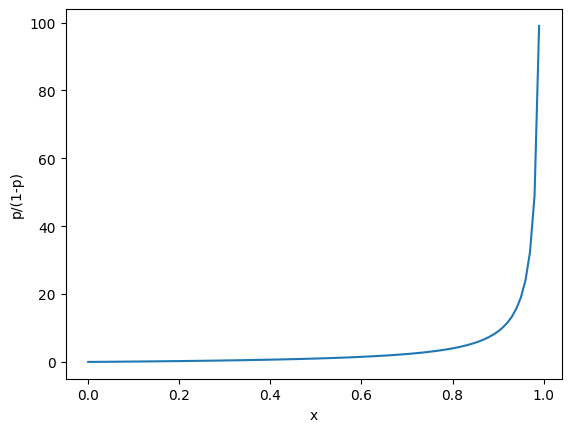

In [28]:
#p/(1-p)
probs=np.arange(0, 1, 0.01)
odds=[p/(1-p) for p in probs]

plt.plot(probs, odds)
plt.xlabel('x')
plt.ylabel('p/(1-p)')
plt.show()

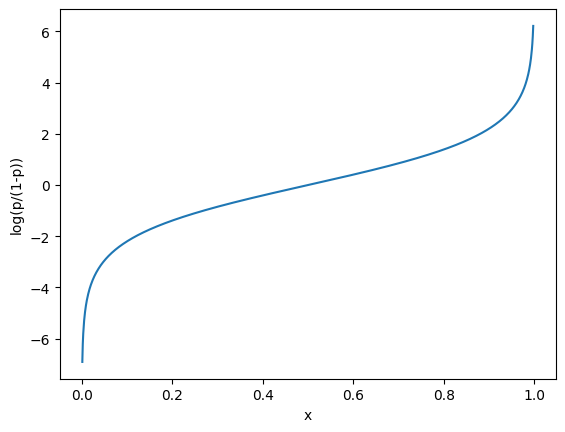

In [29]:
#선형 회귀 모델의 값을 확률로 변환하기 위함
#p를 z로 변환하는 과정
probs=np.arange(0.001, 0.999, 0.001)
logit=[np.log(p/(1-p)) for p in probs]

plt.plot(probs, logit)
plt.xlabel('x')
plt.ylabel('log(p/(1-p))')
plt.show()

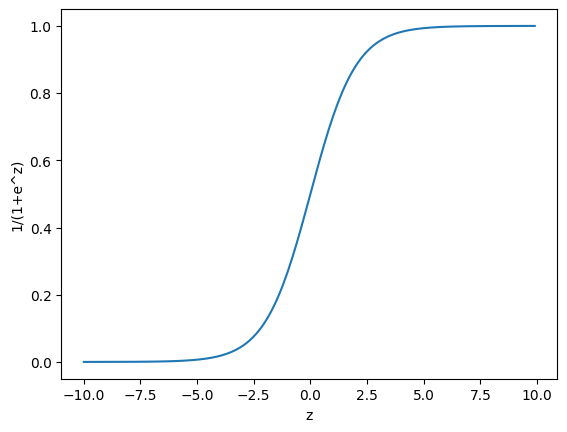

In [30]:
#선형 값을 확률로 변환
#z를 p로 변환하는 과정 -> 따라서 로지스틱 손실 함수에서도 포함된
zs=np.arange(-10, 10, 0.1)
gs=[1/(1+np.exp(-z)) for z in zs]

plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^z)')
plt.show()

In [31]:
#예제 데이터셋
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [32]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

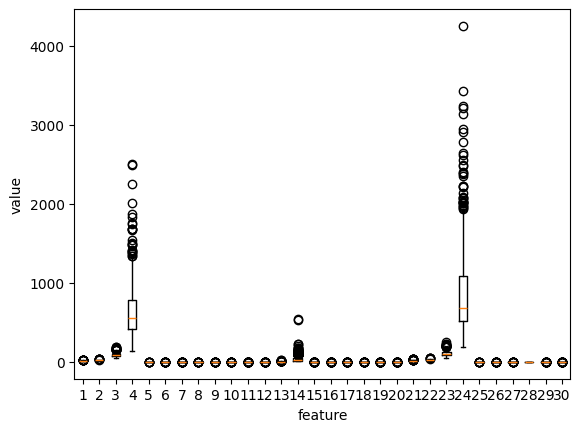

In [33]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

#상자수염 그래프
#박스의 노란 선이 중간값 그 아래 상자 부분이 1사분위 그 위 상자 부분이 3사분위

In [34]:
#타겟 데이터 확인하기
np.unique(cancer.target, return_counts=True)
#(array([0, 1]), array([212, 357]))
#양성 종양(0) 의 개수가 212
#악성 종양(1) 의 개수가 357
#불균형한 데이터 셋

(array([0, 1]), array([212, 357]))

In [35]:
x = cancer.data
y = cancer.target

In [36]:
#모델이 얼만큼 좋은 성능을 내는지 평가하는 방법
#전체 훈련 데이터 세트에서 훈련 세트와 테스트 세트로 나눈다
#훈련 세트가 테스트 세트보다 많아야 한다
#두 세트에 양성, 음성 클래스가 골고루 섞여야 한다

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42) #stratify 양성 음성 비율을 동일하게 유지하기 위한 옵션(타깃값) test_size=0.2 -> 20%
print(x_train.shape, x_test.shape)
np.unique(y_train, return_counts=True)

(455, 30) (114, 30)


(array([0, 1]), array([170, 285]))

In [38]:
class LogisticNeuron:
  def __init__(self):
    self.w = None
    self.b = None
    #특성이 30개이므로 가중치가 30개 필요
    #데이터에따라 특성 개수가 다르므로 나중에 초기화 함

  def forpass(self, x):
    z = np.sum(x*self.w) + self.b
    #np.sum(x, self.w)
    #x는 (569, 30)
    #self.w는 가중치 30개
    #따라서 원소별 연산
    return z

  def backprop(self, x, err):
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1]) #x.shape -> (455, 30) 따라서 x.shape[0] = 455, x.shape[1] = 30 따라서 (30, 0) 인 튜플 구조
    self.b = 0
    for i in range(epochs):
      for x_i, y_i in zip(x,y):
        z = self.forpass(x_i) #정방향 계산
        a = self.activation(z) #시그모이드 함수 (선형 모델을 확률 모델로)
        err = -(y_i - a) #크로스 엔트로피 함수를 미분하면 y_hat - y가 되므로
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad

    return self.w, self.b

  def activation(self, z):
    z = np.clip(z, -100, None) #오버플로우 문제로 인해 범위 제한
    a = 1 / (1 + np.exp(-z)) # 1 / 1 + e^-z
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] #x에 있는 데이터를 꺼내서 정방향 게산을 하고 리스트
    a = self.activation(np.array(z))
    return a > 0.5


In [39]:
neuron = LogisticNeuron()
w, b = neuron.fit(x_train, y_train)
print(w, b)

np.mean(neuron.predict(x_test)==y_test)#mean은 평균

[ 4.48212100e+03  2.50380000e+02  2.25326800e+04  3.77790000e+03
  1.35087800e+01 -1.32472480e+02 -2.30506664e+02 -8.84863530e+01
  5.36320000e+00  1.79346700e+01  3.71583000e+01  1.54449000e+02
 -3.82190300e+02 -8.17391500e+03 -9.08397000e-01 -3.95507940e+01
 -5.58356153e+01 -1.06943310e+01 -7.54708300e+00 -2.11901930e+00
  4.60024100e+03 -3.49980000e+02  1.87290500e+04 -8.51160000e+03
 -1.21236000e+00 -4.92532850e+02 -6.38802909e+02 -1.67616223e+02
 -7.94328000e+01 -1.58601600e+01] 574.0000000055653


0.8245614035087719

In [40]:
#4-5
#단일층 신경망 만들기
#입력층(입력 데이터) -> 은닉층 -> 출력층 -> 활성화 함수 ->y_hat
#은닉층이 없으면 로지스틱 회귀 (단일층)

In [41]:
#확률적 경사 하강법 : 샘플을 무작위로, 샘플 하나 당 그레디언트 계산
#배치 경사 하강법: 전체 샘플들 모두 선택하여 그레디언트 계산
#미니 배치 경사 하강법: 절충안

#데이터가 크면 섞기 어려움 (메모리) -> 인덱스만 저장해서 섞는다


In [42]:
#손실 함수를 추가하자
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    #특성이 30개이므로 가중치가 30개 필요
    #데이터에따라 특성 개수가 다르므로 나중에 초기화 함
    self.losses = []

  def forpass(self, x):
    z = np.sum(x*self.w) + self.b
    #np.sum(x, self.w)
    #x는 (569, 30)
    #self.w는 가중치 30개
    #따라서 원소별 연산
    return z

  def backprop(self, x, err):
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1]) #x.shape -> (455, 30) 따라서 x.shape[0] = 455, x.shape[1] = 30 따라서 (30, 0) 인 튜플 구조
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) #인덱스를 섞음

      for i in indexes:
        z = self.forpass(x[i]) #정방향 계산
        a = self.activation(z) #시그모이드 함수 (선형 모델을 확률 모델로)
        err = -(y[i] - a) #크로스 엔트로피 함수를 미분하면 y_hat - y가 되므로
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))#손실 함
      self.losses.append(loss/len(y)) #평균을 내기 위해
    return self.w, self.b

  def activation(self, z):
    z = np.clip(z, -100, None) #오버플로우 문제로 인해 범위 제한
    a = 1 / (1 + np.exp(-z)) # 1 / 1 + e^-z
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] #x에 있는 데이터를 꺼내서 정방향 게산을 하고 리스트
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)


In [43]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.9298245614035088

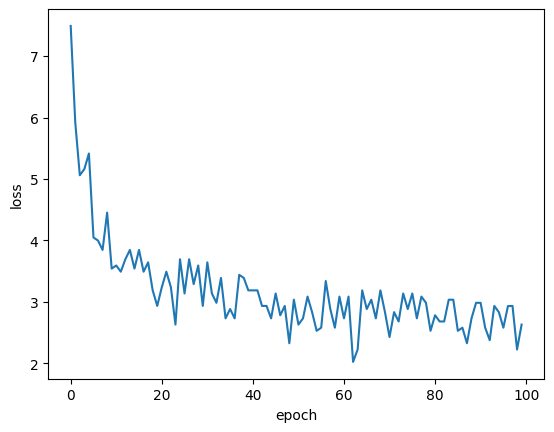

In [44]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [45]:
#사이킷런으로 로지스틱 회귀
from sklearn.linear_model import SGDClassifier

In [49]:
sgd = SGDClassifier(loss='log_loss', max_iter=100, tol=1e-3, random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [50]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])